<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Сбалансируем-классы-с-помощью-class_weight." data-toc-modified-id="Сбалансируем-классы-с-помощью-class_weight.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сбалансируем классы с помощью class_weight.</a></span></li><li><span><a href="#Изменение-порога" data-toc-modified-id="Изменение-порога-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Изменение порога</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Подбор-параметров" data-toc-modified-id="Подбор-параметров-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Подбор параметров</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Описание данных


# Признаки


* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — количество недвижимости у клиента
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата


# Целевой признак


* Exited — факт ухода клиента

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, mean_absolute_error, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
display(df.head(10))
df.info()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В датасете есть лишние данные, которые могут помешать в дальнейшем исследовании:

* Столбцы с не нужными данными - `RowNumber`, `CustomerId` и `Surname`
* Пропуски в столбце `Tenure`
* Категориальные признаки в столбцах `Geography`, `Gender`

Разберемся с ними:

Удалим ненужные столбцы

In [3]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

Пропуски в столбце могут означать, что клиент новый. По этому заменим пропуски на 0.

In [4]:
df['Tenure'].fillna(0, inplace=True)

С помощью прямого кодирования заменим категориальные признаки на численные.

In [5]:
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
<b>Успех:</b> Отлично, идём дальше.</div>

Разделим датасет на обучающую, валидационную и тестовую выборки.

In [6]:
features = df_ohe.drop('Exited', axis=1)
target = df_ohe['Exited']

features_train, features_rest, target_train, target_rest = train_test_split(
    features, target, test_size=.4, random_state=777
)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_rest, target_rest, test_size=.5, random_state=777
)

In [7]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


Масштабируем признаки методом стандартизации.

In [8]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

**Вывод**

1. Ознакомились с данными.
2. Выявили особенность датасета:
    * Столбцы с не нужными данными - `RowNumber`, `CustomerId` и `Surname` - **удалили**
    * Пропуски в столбце `Tenure` - **заменили на 0**
    * Категориальные признаки в столбцах `Geography`, `Gender` - **заменили на численные** 
3. Разбили измененый датасет на 3 выборки - `Обучающую`, `Валилационную` и `Тестовую`
4. Масштабировали признаки методом стандартизации.

## Исследование задачи

Обучим модели и измерим accuracy.

In [9]:
model = LogisticRegression(random_state=777, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid_lr = pd.Series(model.predict(features_valid))
model.score(features_valid, target_valid)

0.829

In [10]:
model = RandomForestClassifier(max_depth = 8, random_state=777)
model.fit(features_train, target_train)
predicted_valid_rfc = pd.Series(model.predict(features_valid))
model.score(features_valid, target_valid)

0.8695

Доля правильных ответов - 86%. Необходимо понять, хороший ли это результат.

Оценим адекватность модели, проверим как часто в целевом признаке встречается `1` и `0`

<AxesSubplot:>

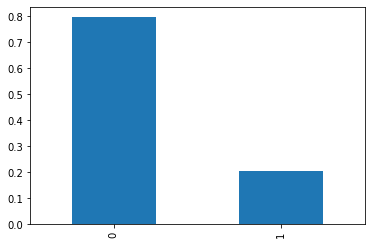

In [11]:
class_frequancy = df['Exited'].value_counts(normalize=True)
class_frequancy.plot(kind='bar')

Классы несбаланированны. Клиенты уходят в 20% случаях.

Посмотрим на частоты классов в результатах предсказания моделей.

0    0.9325
1    0.0675
dtype: float64

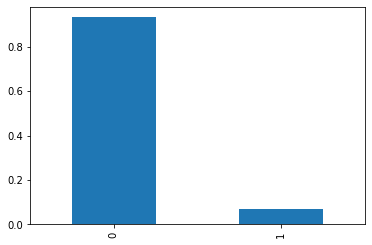

In [12]:
class_frequancy_lr = predicted_valid_lr.value_counts(normalize=True)
class_frequancy_lr.plot(kind='bar')
class_frequancy_lr

0    0.899
1    0.101
dtype: float64

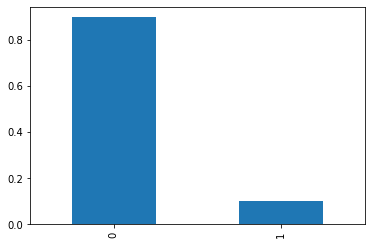

In [13]:
class_frequancy_rfc = predicted_valid_rfc.value_counts(normalize=True)
class_frequancy_rfc.plot(kind='bar')
class_frequancy_rfc

Модели предсказыают более оптимистичный исход. Проверим их на андекватность с помощью константы.

In [14]:
const = pd.Series(0, target.index)
accuracy_score(target, const)

0.7963

Модели предсказывают уход клиенов лучше, чем константа. Попробуем еще улучшить результат с помощью f1-меры

In [15]:
f1_score(target_valid, predicted_valid_lr)

0.31599999999999995

In [16]:
f1_score(target_valid, predicted_valid_rfc)

0.5396825396825397

In [17]:
roc_auc_score(target_valid, predicted_valid_lr)

0.5910937958191947

In [18]:
roc_auc_score(target_valid, predicted_valid_rfc)

0.6946043316157681

**Вывод**

* Классы несбаланированны.
* Клиенты уходят в 20% случаях.
* Проверили модель на адекватность.
* Результат работы модели случайного леса лучше.

## Борьба с дисбалансом

### Сбалансируем классы с помощью class_weight.

In [19]:
model = LogisticRegression(random_state=777, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid_lr = pd.Series(model.predict(features_valid))
f1_score(target_valid, predicted_valid_lr)

0.4619666048237477

In [20]:
model = RandomForestClassifier(max_depth=9, random_state=777, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid_rfc = pd.Series(model.predict(features_valid))
f1_score(target_valid, predicted_valid_rfc)

0.5746268656716418

После балансировки классов мера f1 выглядит лучше, у модели `LogisticRegression` она стала выше в полтора раза.

### Изменение порога

Посмотрим, как изменеится значение f1 при изменении порога.

In [21]:
model = RandomForestClassifier(max_depth=8, random_state=777)
model.fit(features_train, target_train)
probabilities_valid_rfc = model.predict_proba(features_valid)
probabilities_valid_rfc = probabilities_valid_rfc[:, 1]

Напишем функцию для автоматизации подсчета f1 на разном значении порога

In [22]:
def count_threshold(probabilities_valid):
    for threshold in np.arange(0, 0.6, 0.05):
        predicted_valid = probabilities_valid > threshold
        f1 = f1_score(target_valid, predicted_valid)
        print('Порог = {: .2f} / f1 = {: .3f}'. format(threshold, f1))

In [23]:
count_threshold(probabilities_valid_rfc)

Порог =  0.00 / f1 =  0.309
Порог =  0.05 / f1 =  0.353
Порог =  0.10 / f1 =  0.441
Порог =  0.15 / f1 =  0.514
Порог =  0.20 / f1 =  0.543
Порог =  0.25 / f1 =  0.572
Порог =  0.30 / f1 =  0.592
Порог =  0.35 / f1 =  0.587
Порог =  0.40 / f1 =  0.577
Порог =  0.45 / f1 =  0.576
Порог =  0.50 / f1 =  0.540
Порог =  0.55 / f1 =  0.506


f1 после балансировки классов выше, чем при изменении порога

### Уменьшение выборки

Сделаем объекты частого класса (0) не такими частными. Для этого напишем функцию downsample

In [24]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=777)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=777)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=777)
    
    return features_downsampled, target_downsampled

In [25]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

In [26]:
model = LogisticRegression(random_state=777, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid_downsamled_lr = model.predict(features_valid)
f1_score(target_valid, predicted_valid_downsamled_lr)

0.3801935116676152

In [27]:
model = RandomForestClassifier(random_state=777, max_depth=8)
model.fit(features_downsampled, target_downsampled)
predicted_valid_downsamled_rfc = model.predict(features_valid)
f1_score(target_valid, predicted_valid_downsamled_rfc)

0.4313975749840459

Уменьшение выборки дает результат хуже, чем балансировка классов или изменение порога

### Увеличение выборки

In [28]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [29]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 2)

In [30]:
target_upsampled.value_counts()

0    4785
1    2430
Name: Exited, dtype: int64

In [31]:
model = LogisticRegression(random_state=777, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid_upsampled_lr = model.predict(features_valid)
f1_score(target_valid, predicted_valid_upsampled_lr)

0.4394366197183099

In [32]:
model = RandomForestClassifier(random_state=777, max_depth=8)
model.fit(features_upsampled, target_upsampled)
predicted_valid_upsampled_rfc = model.predict(features_valid)
f1_score(target_valid, predicted_valid_upsampled_rfc)

0.5915080527086384

Увеличение выборки так же дает результаты хуже чем балансировка классов.

### Подбор параметров 

Для модели RandomForestClassifier подберем параментры `max_depth` и `n_estimators`, при которых она покажет наилучшие результаты.


In [35]:
%%time

model = RandomForestClassifier(random_state=777)
parametrs = { 'n_estimators' : range (40, 140, 20),
              'max_depth' : range (5, 11, 1) }

grid = GridSearchCV(model, parametrs)
grid.fit(features_upsampled, target_upsampled)

grid.best_params_

CPU times: user 54.9 s, sys: 209 ms, total: 55.1 s
Wall time: 55.2 s


{'max_depth': 10, 'n_estimators': 120}

**Вывод**

* Лучшие результаты были достигнуты при балансировке классов.
* Тестировать будем модель RandomForestClassifier со значениями `max_depth=10` и `n_estimators=120`

## Тестирование модели

Обучим финальную модель и проверим ее на тестовой выборке.

In [36]:
final_model = RandomForestClassifier(random_state=777, max_depth=10, n_estimators=100)
final_model.fit(features_upsampled, target_upsampled)
predicted_test = final_model.predict(features_test)
f1_score(target_test, predicted_test)

0.6248492159227986

Требуемое значение f1 достигнуто.

Подсчитаем площадь под ROC-кривой для модели(AUC-ROC), что бы узнать насколько ее точность отличается от случайной.

In [37]:
probabilities_test = final_model.predict_proba(features_test)
probabilities_test = probabilities_test[:, 1]
roc_auc_score(target_test, probabilities_test)

0.8601179038248545

## Общий вывод

1. Ознакомились с данными и подготовили их к исследованию (преобразовали категориальные признаки в численные с помощью техники прямого кодирования One-Hot Encoding,разбили получившийся датасет на 3 выборки - обучающую, валидационную и тестовую, масштабировали признаки методом стандартизации).
2. Исследовали баланс классов - они оказались несбалансированы, изучили модели без учёта дисбаланса, выяснили, что результат работы модели случайного леса лучше.
3. Применили 2 способа борбы с дисбалансом - аргумент class_weight и изменение порога. Лучшие результаты показал способы борьбы с дисбалансом class_weight. Выявили лучшие значения n_estimators и max_depth для модели случайного леса.
4. Обучили финальную модель и проверили ее на тестовой выборке. Достигли значения F1 = 0.62. Исследовали метрику AUC-ROC - ее значение в данном случае почти не отличается от значения для случайной модели (0.5)